In [19]:
#FIRST TASK
#Повнозв'язані нейронні мережі
#Вирішіть завдання класифікації даних, з якими ви працювали в лабораторній № 1 за допомогою
#повнозв’язаної нейромережі прямого поширення (fully connected feed-forward network).
#Результати порівняйте з одержаними раніше. 

In [71]:
import pandas as pd
import numpy as np
from PIL import Image
import chardet, os, cv2
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from tensorflow import data as tf_data
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPool2D, Embedding, LSTM
from tensorflow.keras import models


In [13]:
dataset = pd.read_csv('Phishing_Legitimate_full.csv')
dataset.keys()

Index(['id', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperl

In [5]:
Leb_Enc = preprocessing.LabelEncoder()
dataset['PctExtHyperlinks'] = Leb_Enc.fit_transform(dataset['PctExtHyperlinks'])
dataset['PctExtResourceUrls'] = Leb_Enc.fit_transform(dataset['PctExtResourceUrls'])
dataset['PctNullSelfRedirectHyperlinks'] = Leb_Enc.fit_transform(dataset['PctNullSelfRedirectHyperlinks'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   id                                  10000 non-null  int64
 1   NumDots                             10000 non-null  int64
 2   SubdomainLevel                      10000 non-null  int64
 3   PathLevel                           10000 non-null  int64
 4   UrlLength                           10000 non-null  int64
 5   NumDash                             10000 non-null  int64
 6   NumDashInHostname                   10000 non-null  int64
 7   AtSymbol                            10000 non-null  int64
 8   TildeSymbol                         10000 non-null  int64
 9   NumUnderscore                       10000 non-null  int64
 10  NumPercent                          10000 non-null  int64
 11  NumQueryComponents                  10000 non-null  int64
 12  NumAm

In [6]:
scal = preprocessing.MinMaxScaler()
names = dataset.columns
dataset_scaler = scal.fit_transform(dataset)
dataset = pd.DataFrame(dataset_scaler, columns=names)
dataset.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,0.0000,0.1,0.071429,0.277778,0.248963,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,1.0,1.0,0.5,1.0,1.0,0.0,1.0,1.0
1,0.0001,0.1,0.071429,0.166667,0.547718,0.000000,0.0,0.0,0.0,0.111111,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,0.0002,0.1,0.071429,0.111111,0.190871,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,1.0,0.5,0.0,1.0,0.0,0.5,1.0
3,0.0003,0.1,0.071429,0.333333,0.278008,0.018182,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
4,0.0004,0.1,0.000000,0.222222,0.141079,0.000000,0.0,0.0,0.0,0.000000,...,1.0,0.0,0.0,1.0,1.0,0.0,0.5,0.0,0.0,1.0


In [8]:
X = dataset.drop('CLASS_LABEL', axis=1);
y = dataset['CLASS_LABEL'];

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5976)

y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

In [15]:
FCFFN = Sequential(name = "FFNN")

FCFFN.add(Dense(20, input_shape=(49,), activation = 'relu'))
FCFFN.add(Dense(50, activation = 'relu'))
FCFFN.add(Dense(2, activation = 'sigmoid'))

FCFFN.compile(loss = "binary_crossentropy", metrics = ['accuracy'], optimizer = 'Adam')
results = FCFFN.fit(X_train, y_train, epochs = 75)

Epoch 1/75
235/235 [==============================] - 1s 1ms/step - loss: 0.3535 - accuracy: 0.8613
Epoch 2/75
235/235 [==============================] - 0s 1ms/step - loss: 0.0695 - accuracy: 0.9787
Epoch 3/75
235/235 [==============================] - 0s 1ms/step - loss: 0.0391 - accuracy: 0.9887
Epoch 4/75
235/235 [==============================] - 0s 1ms/step - loss: 0.0285 - accuracy: 0.9911
Epoch 5/75
235/235 [==============================] - 0s 1ms/step - loss: 0.0226 - accuracy: 0.9925
Epoch 6/75
235/235 [==============================] - 0s 1ms/step - loss: 0.0202 - accuracy: 0.9931
Epoch 7/75
235/235 [==============================] - 0s 1ms/step - loss: 0.0171 - accuracy: 0.9944
Epoch 8/75
235/235 [==============================] - 0s 1ms/step - loss: 0.0142 - accuracy: 0.9953
Epoch 9/75
235/235 [==============================] - 0s 1ms/step - loss: 0.0129 - accuracy: 0.9959
Epoch 10/75
235/235 [==============================] - 0s 1ms/step - loss: 0.0109 - accuracy: 0.9969

In [17]:
calc_acc = FCFFN.evaluate(X_train, y_train, verbose = 1) #Додав вивід результату для навчання
print('Losses:', calc_acc[0])
print('Accuracy:', calc_acc[1])

235/235 [==============================] - 0s 1ms/step - loss: 6.8050e-04 - accuracy: 0.9999
Losses: 0.0006804957520216703
Accuracy: 0.9998666644096375


In [18]:
calc_acc = FCFFN.evaluate(X_test, y_test, verbose = 1)
print('Losses:', calc_acc[0])
print('Accuracy:', calc_acc[1])

79/79 [==============================] - 0s 1ms/step - loss: 0.0148 - accuracy: 0.9972
Losses: 0.014808381907641888
Accuracy: 0.9972000122070312


In [20]:
#SECOND TASK
#Згорткові нейронні мережі
#Вирішіть завдання класифікації зображень за допомогою згорткової (convolutional) нейромережі
#(якщо в обраному датасеті класів забагато, достатньо залишити 3-5).

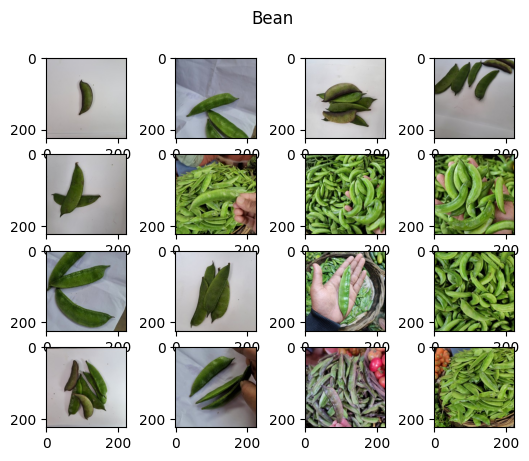

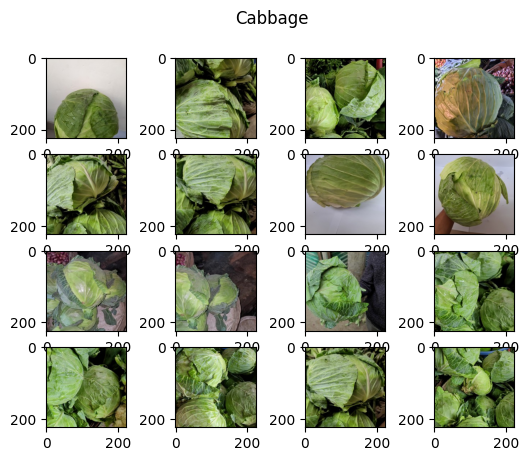

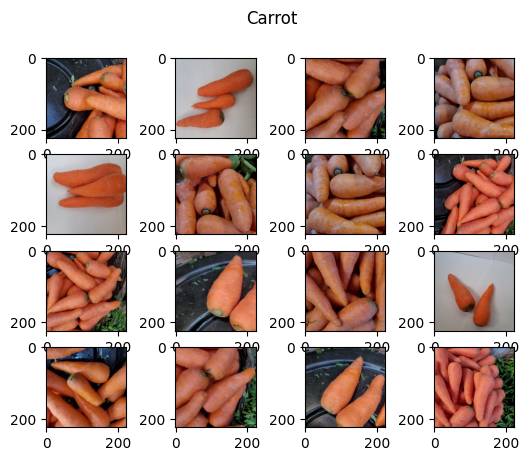

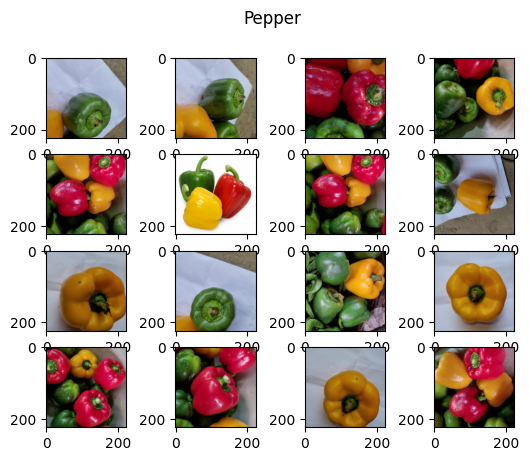

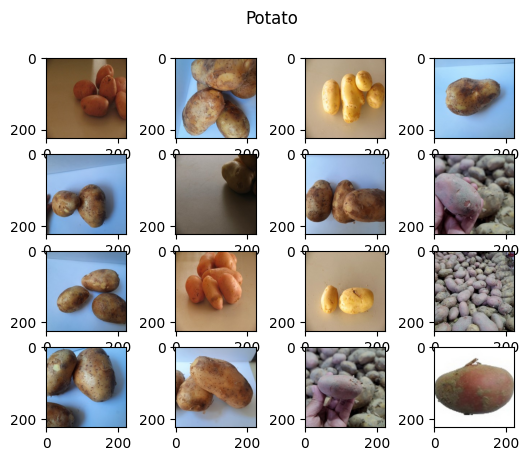

In [25]:
categories = ["Bean", "Cabbage", "Carrot", "Pepper", "Potato"]
path = "./Train/"

for category in categories:
    figure, _ = plt.subplots(4, 4)
    figure.suptitle(category)
    for k, v in enumerate(os.listdir(path + category)[:16]):
        image = plt.imread(path + category + '/' + v)
        plt.subplot(4, 4, k+1)
        plt.imshow(image)
    plt.show()

In [26]:
num_skipped = 0
for folder_name in ("Bean", "Cabbage", "Carrot", "Pepper", "Potato"):
    folder_path = os.path.join("./Train/", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = b"JFIF" in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            os.remove(fpath)

print(f">{num_skipped} images were deleted")

>1458 images were deleted


In [27]:
X = []
y = []
paths = []

for k, cat in enumerate(categories):
    for f in os.listdir(path + cat):
        paths.append([path + cat + '/' + f, k])

for path in paths:
    image = cv2.imread(path[0])
    image = cv2.resize(image, (256, 256))
    X.append(image)
    
    label = path[1]
    y.append(label)
    
X = np.array(X, dtype="float") / 255
y = np.array(y)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=9576)
print(X_train.shape)
print(X_test.shape)

(3187, 256, 256, 3)
(355, 256, 256, 3)


In [29]:
alpha = 0.02
model = keras.Sequential()

model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same", input_shape=(X_train.shape[1:])))
model.add(layers.LeakyReLU(alpha=alpha))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
model.add(layers.LeakyReLU(alpha=alpha))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same"))
model.add(layers.LeakyReLU(alpha=alpha))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.LeakyReLU(alpha=alpha))

model.add(layers.Dense(5, activation = "softmax"))
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='Adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256, 256, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                   

In [30]:
my_cbs = [keras.callbacks.EarlyStopping(patience = 30)]
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 75, batch_size = 50, callbacks = my_cbs, verbose = 1)

Epoch 1/75
64/64 [==============================] - 42s 630ms/step - loss: 1.0092 - accuracy: 0.7879 - val_loss: 0.1505 - val_accuracy: 0.9465
Epoch 2/75
64/64 [==============================] - 39s 615ms/step - loss: 0.0963 - accuracy: 0.9686 - val_loss: 0.0459 - val_accuracy: 0.9915
Epoch 3/75
64/64 [==============================] - 39s 607ms/step - loss: 0.0317 - accuracy: 0.9896 - val_loss: 0.0522 - val_accuracy: 0.9775
Epoch 4/75
64/64 [==============================] - 39s 617ms/step - loss: 0.0075 - accuracy: 0.9987 - val_loss: 0.0087 - val_accuracy: 0.9972
Epoch 5/75
64/64 [==============================] - 39s 611ms/step - loss: 0.0054 - accuracy: 0.9987 - val_loss: 0.0043 - val_accuracy: 0.9972
Epoch 6/75
64/64 [==============================] - 39s 617ms/step - loss: 5.4818e-04 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 7/75
64/64 [==============================] - 39s 614ms/step - loss: 1.8540e-04 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy

In [31]:
ress = model.evaluate(X_test, y_test)
print('Losses:', ress[0])
print('Accuracy:', ress[1])

12/12 [==============================] - 1s 58ms/step - loss: 0.0085 - accuracy: 0.9972
Losses: 0.008515140041708946
Accuracy: 0.997183084487915


In [32]:
ress = model.evaluate(X_train, y_train)
print('Losses:', ress[0])
print('Accuracy:', ress[1])

100/100 [==============================] - 8s 70ms/step - loss: 5.3052e-06 - accuracy: 1.0000
Losses: 5.305226750351721e-06
Accuracy: 1.0


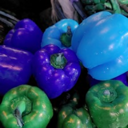

Fact class is Pepper
Prediction class is	Pepper
Distributions are 0.00% Bean; 0.00% Cabbage; 0.00% Carrot; 100.00% Pepper; 0.00% Potato.




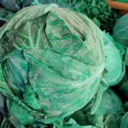

Fact class is Cabbage
Prediction class is	Cabbage
Distributions are 0.00% Bean; 100.00% Cabbage; 0.00% Carrot; 0.00% Pepper; 0.00% Potato.




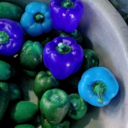

Fact class is Pepper
Prediction class is	Pepper
Distributions are 0.00% Bean; 0.00% Cabbage; 0.00% Carrot; 100.00% Pepper; 0.00% Potato.




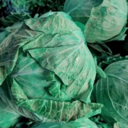

Fact class is Cabbage
Prediction class is	Cabbage
Distributions are 0.00% Bean; 100.00% Cabbage; 0.00% Carrot; 0.00% Pepper; 0.00% Potato.




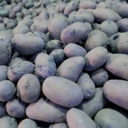

Fact class is Potato
Prediction class is	Potato
Distributions are 0.00% Bean; 0.00% Cabbage; 0.00% Carrot; 0.00% Pepper; 100.00% Potato.




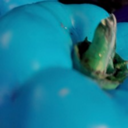

Fact class is Pepper
Prediction class is	Pepper
Distributions are 0.00% Bean; 0.00% Cabbage; 0.00% Carrot; 100.00% Pepper; 0.00% Potato.




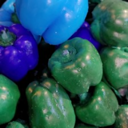

Fact class is Pepper
Prediction class is	Pepper
Distributions are 0.00% Bean; 0.00% Cabbage; 0.00% Carrot; 100.00% Pepper; 0.00% Potato.




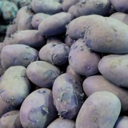

Fact class is Potato
Prediction class is	Potato
Distributions are 0.01% Bean; 0.00% Cabbage; 0.00% Carrot; 0.00% Pepper; 99.99% Potato.




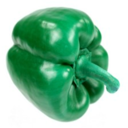

Fact class is Pepper
Prediction class is	Pepper
Distributions are 0.00% Bean; 0.00% Cabbage; 0.00% Carrot; 100.00% Pepper; 0.00% Potato.




In [35]:
for i in range(9):
    idx = np.random.randint(0, len(X_test))
    image = X_test[idx]
    a_class = y_test[idx]
    pred =  model.predict(np.array([image]), verbose=0)[0]
    pred_class = (pred/max(pred)).astype(int)
    
    if a_class == 0:
        t_class = 'Bean'
    elif a_class == 1:
        t_class = 'Cabbage'
    elif a_class == 2:
        t_class = 'Carrot'
    elif a_class == 3:
        t_class = 'Pepper'
    else:
        t_class = 'Potato'
    
    pred_class = 'Bean' if pred_class[0] else 'Cabbage' if pred_class[1] else 'Carrot' if pred_class[2] else 'Pepper' if pred_class[3] else 'Potato'

    array = (image * 255).astype(np.uint8).reshape((256, 256, 3))
    display(Image.fromarray(array).resize((128, 128)))
    print(f'Fact class is {t_class}\nPrediction class is\t{pred_class}\nDistributions are {100*pred[0]:.2f}% Bean; {100*pred[1]:.2f}% Cabbage; {100*pred[2]:.2f}% Carrot; {100*pred[3]:.2f}% Pepper; {100*pred[4]:.2f}% Potato.\n\n')


In [36]:
#THIRD TASK
#Рекурентні нейронні мережі
#Вирішіть задачу класифікації текстів (з якими ви працювали в лабораторній № 2) за допомогою рекурентної
#нейромережі. Результати порівняйте з одержаними раніш. 

In [72]:
dataset = pd.read_csv('text.csv')
dataset.columns

Index(['Text', 'Label'], dtype='object')

In [73]:
dataset.head()

,Text,Label
0,Budget to set scene for election\n \n Gordon B...,0
1,Army chiefs in regiments decision\n \n Militar...,0
2,Howard denies split over ID cards\n \n Michael...,0
3,Observers to monitor UK election\n \n Minister...,0
4,Kilroy names election seat target\n \n Ex-chat...,0


In [74]:
X = dataset['Text']
y = dataset['Label']
from collections import Counter
Counter(dataset['Label'])

Counter({1: 511, 4: 510, 0: 417, 2: 401, 3: 386})

In [75]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, ..., 4, 4, 4], dtype=int64)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [77]:
token = tf.keras.preprocessing.text.Tokenizer(num_words=100000)
token.fit_on_texts(X_train)
X_train_s = token.texts_to_sequences(X_train)
X_test_s = token.texts_to_sequences(X_test)
total_sizr = len(token.word_index) + 1


In [78]:
max_len = 20
X_train_p = tf.keras.preprocessing.sequence.pad_sequences(X_train_seq, maxlen = max_len)
X_test_p = tf.keras.preprocessing.sequence.pad_sequences(X_test_seq, maxlen = max_len)

y_train_one_h = tf.keras.utils.to_categorical(y_train, num_classes = 5)
y_test_one_h = tf.keras.utils.to_categorical(y_test, num_classes = 5)

In [81]:
model = models.Sequential()
model.add(layers.Embedding(input_dim=100000, output_dim = 50, input_length=max_len))
model.add(layers.LSTM(units = 100))
model.add(layers.Dense(5, activation='softmax'))

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer = 'Adam')

classif = model.fit(X_train_p, y_train_one_h, epochs=15, batch_size=32, validation_split = 0.2)

loss, accuracy = model.evaluate(X_test_p, y_test_one_h)

print(f'Test accuracy: {accuracy * 100:.2f}%')

Epoch 1/15
45/45 [==============================] - 4s 47ms/step - loss: 0.5580 - accuracy: 0.2142 - val_loss: 0.5001 - val_accuracy: 0.3118
Epoch 2/15
45/45 [==============================] - 2s 38ms/step - loss: 0.4959 - accuracy: 0.2900 - val_loss: 0.4939 - val_accuracy: 0.2865
Epoch 3/15
45/45 [==============================] - 2s 38ms/step - loss: 0.4507 - accuracy: 0.4305 - val_loss: 0.3989 - val_accuracy: 0.5590
Epoch 4/15
45/45 [==============================] - 2s 38ms/step - loss: 0.2715 - accuracy: 0.7542 - val_loss: 0.3230 - val_accuracy: 0.6292
Epoch 5/15
45/45 [==============================] - 2s 38ms/step - loss: 0.1359 - accuracy: 0.9101 - val_loss: 0.3490 - val_accuracy: 0.6685
Epoch 6/15
45/45 [==============================] - 2s 39ms/step - loss: 0.0507 - accuracy: 0.9677 - val_loss: 0.3755 - val_accuracy: 0.6545
Epoch 7/15
45/45 [==============================] - 2s 39ms/step - loss: 0.0214 - accuracy: 0.9909 - val_loss: 0.3819 - val_accuracy: 0.6742
Epoch 8/15
45

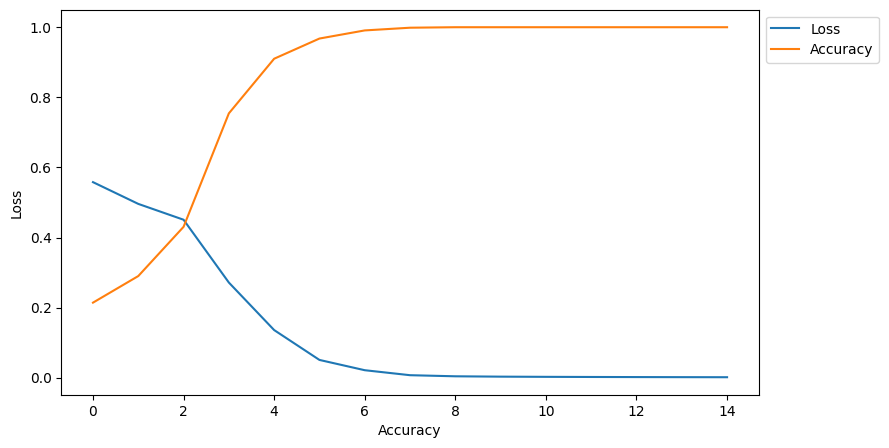

In [82]:
plt.figure(figsize=(9, 5))
plt.plot(classif.history['loss'])
plt.plot(classif.history['accuracy'])

plt.ylabel('Loss')
plt.xlabel('Accuracy')
plt.legend(['Loss', 'Accuracy'], bbox_to_anchor = (1, 1))
plt.show()